In [ ]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

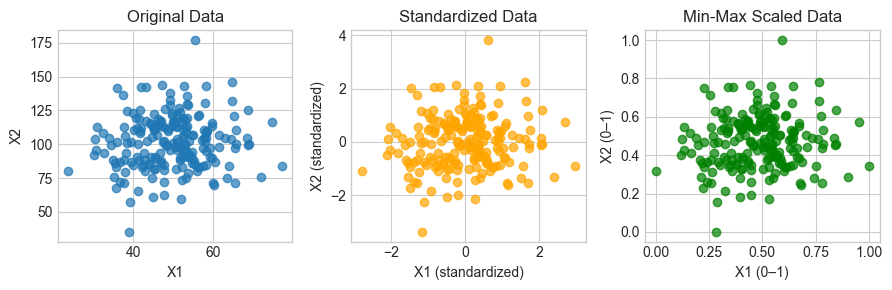

In [27]:
# draw (X1, X2) randomly and use standardization to transform them
# plot the original and standardized data

# 1. Generate random data
np.random.seed(42)
X1 = np.random.normal(loc=50, scale=10, size=200)  # mean=50, std=10
X2 = np.random.normal(loc=100, scale=20, size=200) # mean=100, std=20
X = np.column_stack((X1, X2))

# 2. Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# min-max scaling
scaler_mm = MinMaxScaler()
X_mm = scaler_mm.fit_transform(X)

# 3. Plot original vs standardized data
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Original
axes[0].scatter(X[:, 0], X[:, 1], alpha=0.7)
axes[0].set_title("Original Data")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

# Standardized
axes[1].scatter(X_std[:, 0], X_std[:, 1], alpha=0.7, color='orange')
axes[1].set_title("Standardized Data")
axes[1].set_xlabel("X1 (standardized)")
axes[1].set_ylabel("X2 (standardized)")

# Min-max scaled
axes[2].scatter(X_mm[:, 0], X_mm[:, 1], alpha=0.7, color='green')
axes[2].set_title("Min-Max Scaled Data")
axes[2].set_xlabel("X1 (0–1)")
axes[2].set_ylabel("X2 (0–1)")

plt.tight_layout()
plt.show()


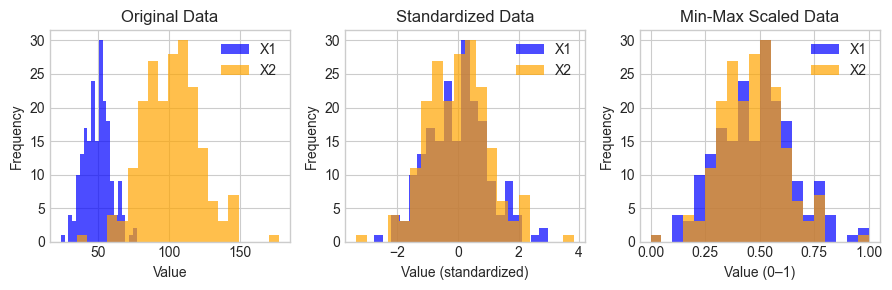

In [ ]:
# 3. Plot original vs standardized data
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Original
axes[0].hist(X[:, 0], bins=20, alpha=0.7, color = 'blue', label='X1')
axes[0].hist(X[:, 1], bins=20, alpha=0.7, color = 'orange', label='X2')
axes[0].set_title("Original Data")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Standardized
axes[1].hist(X_std[:, 0], bins=20, alpha=0.7, color = 'blue', label='X1')
axes[1].hist(X_std[:, 1], bins=20, alpha=0.7, color = 'orange', label='X2')
axes[1].set_title("Standardized Data")
axes[1].set_xlabel("Value (standardized)")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Min-max scaled
axes[2].hist(X_mm[:, 0], bins=20, alpha=0.7, color = 'blue', label='X1')
axes[2].hist(X_mm[:, 1], bins=20, alpha=0.7, color = 'orange', label='X2')
axes[2].set_title("Min-Max Scaled Data")
axes[2].set_xlabel("Value (0–1)")
axes[2].set_ylabel("Frequency")
axes[2].legend()

plt.tight_layout()
plt.show()

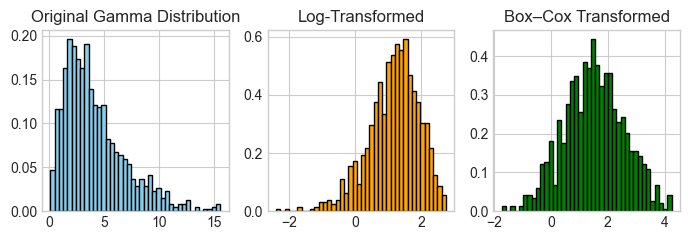

In [38]:
# generate 1D gamma distributed data and transform it so it looks like bell-shaped (normal)
# apply power transform such as log transform, box-cox transform, Yeo-Johnson transform

from scipy import stats
from sklearn.preprocessing import PowerTransformer

# 1. Generate 1D gamma-distributed data
np.random.seed(42)
X = np.random.gamma(shape=2.0, scale=2.0, size=1000).reshape(-1, 1)

# 2. Log transform
X_log = np.log(X)

# 3. Box-Cox transform (requires positive values)
pt = PowerTransformer(method='box-cox', standardize=False)
X_boxcox = pt.fit_transform(X)

# 4. Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5))

axes[0].hist(X, bins=40, color="skyblue", edgecolor="black", density=True)
axes[0].set_title("Original Gamma Distribution")

axes[1].hist(X_log, bins=40, color="orange", edgecolor="black", density=True)
axes[1].set_title("Log-Transformed")

axes[2].hist(X_boxcox, bins=40, color="green", edgecolor="black", density=True)
axes[2].set_title("Box–Cox Transformed")

plt.tight_layout()
plt.show()

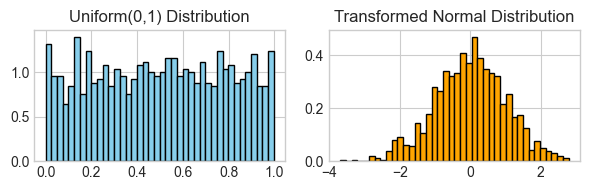

In [ ]:
# turn a uniform distribution into a normal distribution
from scipy.stats import norm

# 1. generate uniform (0,1) data
np.random.seed(1)
U = np.random.uniform(0,1,1000)

# 2. transform to normal using inverse CDF (ppf)
X = norm.ppf(U)

# 3. plot
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Uniform
axes[0].hist(U, bins=40, density=True, color="skyblue", edgecolor="black")
axes[0].set_title("Uniform(0,1) Distribution")

# Normal
axes[1].hist(X, bins=40, density=True, color="orange", edgecolor="black")
axes[1].set_title("Transformed Normal Distribution")

plt.tight_layout()
plt.show()

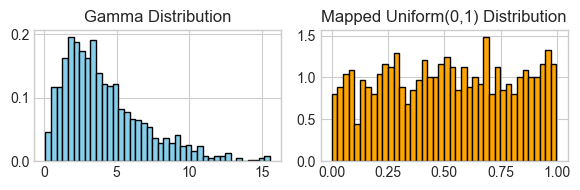

In [43]:
# turn any distribution into a normal distribution
# by applying probability integral transform theorem
from scipy.stats import gamma

# 1. generate gamma-distributed data
np.random.seed(42)
X = np.random.gamma(shape=2.0, scale=2.0, size=1000)

# 2. Map gamma to Uniform(0,1) using its CDF
U = gamma.cdf(X, a=2, scale =2)

# 3. plot
fig, axes = plt.subplots(1, 2, figsize=(6, 2))

# Gamma histogram
axes[0].hist(X, bins=40, density=True, color="skyblue", edgecolor="black")
axes[0].set_title("Gamma Distribution")

# Uniform histogram
axes[1].hist(U, bins=40, density=True, color="orange", edgecolor="black")
axes[1].set_title("Mapped Uniform(0,1) Distribution")

plt.tight_layout()
plt.show()